<a href="https://colab.research.google.com/github/SBANTHIYA/ASSIGNMENT2-SBANTHIYA/blob/master/FinalDropoutProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
# define location of dataset


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
folder = '/content/gdrive/My Drive/Cat and Dog Classification'

In [4]:
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)
preview=folder+'/preview'

In [5]:
print(os.listdir('/content/gdrive/My Drive/Cat and Dog Classification/train'))

['dog', 'cat']


In [6]:


IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=20


# Flow training images in batches of 20 using train_datagen generator
training_generator = training_data_generator.flow_from_directory(
        '/content/gdrive/My Drive/Cat and Dog Classification/train',  # This is the source directory for training images
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),  # All images will be resized to 150x150
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_data_generator.flow_from_directory(
        '/content/gdrive/My Drive/Cat and Dog Classification/validation',
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary')

test_generator = test_data_generator.flow_from_directory(
    '/content/gdrive/My Drive/Cat and Dog Classification/test',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False)




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
#BASE MODEL
model = Sequential()
model.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1

In [29]:
history = model.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 11s - loss: 0.8598 - accuracy: 0.5600 - val_loss: 0.6941 - val_accuracy: 0.4950
Epoch 2/200
5/5 - 8s - loss: 0.7009 - accuracy: 0.5400 - val_loss: 0.6978 - val_accuracy: 0.4300
Epoch 3/200
5/5 - 7s - loss: 0.6967 - accuracy: 0.4700 - val_loss: 0.6916 - val_accuracy: 0.5300
Epoch 4/200
5/5 - 7s - loss: 0.6909 - accuracy: 0.5500 - val_loss: 0.6949 - val_accuracy: 0.5300
Epoch 5/200
5/5 - 7s - loss: 0.7020 - accuracy: 0.4200 - val_loss: 0.6927 - val_accuracy: 0.5300
Epoch 6/200
5/5 - 7s - loss: 0.6884 - accuracy: 0.5400 - val_loss: 0.6944 - val_accuracy: 0.5150
Epoch 7/200
5/5 - 7s - loss: 0.7009 - accuracy: 0.3700 - val_loss: 0.6930 - val_accuracy: 0.4800
Epoch 8/200
5/5 - 7s - loss: 0.6930 - accuracy: 0.5300 - val_loss: 0.6929 - val_accuracy: 0.4750
Epoch 9/200
5/5 - 7s - loss: 0.6919 - accuracy: 0.5400 - val_loss: 0.6894 - val_accuracy: 0.5500
Epoch 10/200
5/5 - 7s - loss: 0.6936 - accuracy: 0.5500 - val_loss: 0.7042 - val_accuracy: 0.4800
Epoch 11/200
5/5 - 7s - loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


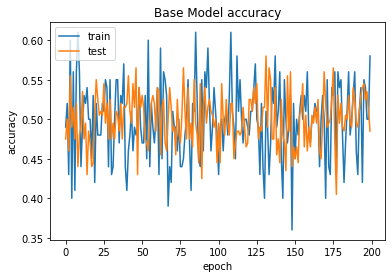

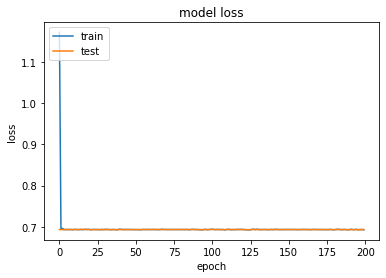

In [36]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

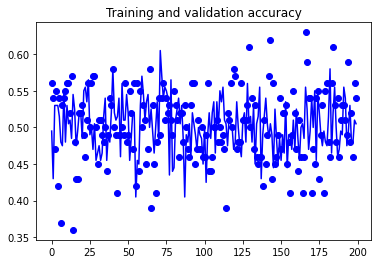

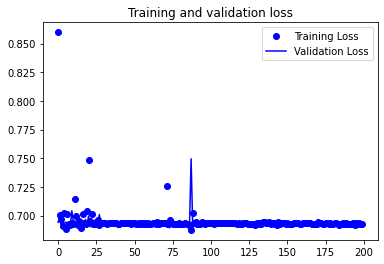

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy') #blue dots
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') # blue lines
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
_,baseline_acc = model.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (baseline_acc * 100.0))
model_chg= ((baseline_acc-baseline_acc)/baseline_acc)*100
print (model_chg, "%")

Test Accuracy: 50.000%
0.0 %


In [12]:
from keras.models import save_model

model.save("/content/drive/My Drive/Cat and Dog Classification/output_model_.BASE")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Cat and Dog Classification/output_model_.BASE/assets


In [13]:
#model 1:  add dropout with dropout rate of 0.5 after second convolutional layer
model1 = Sequential()
model1.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3),activation="relu"))
model1.add(Dropout(0.5))
model1.add(Conv2D(64, (3, 3),activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16,activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation="sigmoid"))

model1.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [14]:
history = model1.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 2.5898 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.4850
Epoch 2/200
5/5 - 7s - loss: 0.7561 - accuracy: 0.4500 - val_loss: 0.6932 - val_accuracy: 0.5200
Epoch 3/200
5/5 - 7s - loss: 0.6976 - accuracy: 0.4700 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 4/200
5/5 - 7s - loss: 0.6943 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5100
Epoch 5/200
5/5 - 7s - loss: 0.6943 - accuracy: 0.4700 - val_loss: 0.6934 - val_accuracy: 0.4950
Epoch 6/200
5/5 - 7s - loss: 0.6847 - accuracy: 0.5700 - val_loss: 0.6914 - val_accuracy: 0.5350
Epoch 7/200
5/5 - 7s - loss: 0.6944 - accuracy: 0.5100 - val_loss: 0.6928 - val_accuracy: 0.5400
Epoch 8/200
5/5 - 7s - loss: 0.6951 - accuracy: 0.5500 - val_loss: 0.6929 - val_accuracy: 0.5250
Epoch 9/200
5/5 - 7s - loss: 0.6963 - accuracy: 0.5300 - val_loss: 0.6929 - val_accuracy: 0.5300
Epoch 10/200
5/5 - 7s - loss: 0.6910 - accuracy: 0.5200 - val_loss: 0.6929 - val_accuracy: 0.5250
Epoch 11/200
5/5 - 7s - loss:

In [15]:
_,model1_acc = model1.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (model1_acc * 100.0))
model1_chg= ((model1_acc-baseline_acc)/baseline_acc)*100
print (model1_chg, "%")

Test Accuracy: 64.300%
28.600001335144043 %


In [16]:
#model 2:  add dropout with dropout rate of 0.5 after second maxpool layer
model2 = Sequential()
model2.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation="relu"))
model2.add(Dropout(0.5))
model2.add(Conv2D(64, (3, 3),activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(16,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation="sigmoid"))

model2.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 35, 35, 64)       

In [17]:
history = model2.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 2.1800 - accuracy: 0.5600 - val_loss: 0.6912 - val_accuracy: 0.5150
Epoch 2/200
5/5 - 7s - loss: 0.7212 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.4800
Epoch 3/200
5/5 - 7s - loss: 0.6983 - accuracy: 0.5600 - val_loss: 0.6935 - val_accuracy: 0.4800
Epoch 4/200
5/5 - 7s - loss: 0.7114 - accuracy: 0.5200 - val_loss: 0.6928 - val_accuracy: 0.5200
Epoch 5/200
5/5 - 7s - loss: 0.6904 - accuracy: 0.5300 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 6/200
5/5 - 7s - loss: 0.6877 - accuracy: 0.5600 - val_loss: 0.6917 - val_accuracy: 0.5600
Epoch 7/200
5/5 - 7s - loss: 0.7550 - accuracy: 0.5400 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 8/200
5/5 - 7s - loss: 0.6949 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/200
5/5 - 7s - loss: 0.6844 - accuracy: 0.5300 - val_loss: 0.6921 - val_accuracy: 0.5800
Epoch 10/200
5/5 - 7s - loss: 0.7017 - accuracy: 0.4400 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 11/200
5/5 - 7s - loss:

In [18]:
_,model2_acc = model2.evaluate(validation_generator, steps=len(validation_generator),verbose=0)
print('Validation Accuracy: %.3f%%' % (model2_acc * 100.0))
model2_chg= ((model2_acc-baseline_acc)/baseline_acc)*100
print (model2_chg, "%")

Validation Accuracy: 63.800%
27.60000228881836 %


In [19]:
#model 3:  change dropout rate from 0.5 to 0.1- change to base model
model3 = Sequential()
model3.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3),activation="relu"))

model3.add(Conv2D(64, (3, 3),activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Flatten())
model3.add(Dense(16,activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(1,activation="sigmoid"))

model3.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [20]:
history = model3.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 1.4147 - accuracy: 0.4800 - val_loss: 0.6815 - val_accuracy: 0.5450
Epoch 2/200
5/5 - 7s - loss: 0.6922 - accuracy: 0.5400 - val_loss: 0.6904 - val_accuracy: 0.5300
Epoch 3/200
5/5 - 6s - loss: 0.6937 - accuracy: 0.5200 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 4/200
5/5 - 7s - loss: 0.6905 - accuracy: 0.5800 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 5/200
5/5 - 7s - loss: 0.6869 - accuracy: 0.5300 - val_loss: 0.8870 - val_accuracy: 0.4800
Epoch 6/200
5/5 - 7s - loss: 0.7761 - accuracy: 0.4700 - val_loss: 0.6929 - val_accuracy: 0.4950
Epoch 7/200
5/5 - 7s - loss: 0.6946 - accuracy: 0.4500 - val_loss: 0.6938 - val_accuracy: 0.4650
Epoch 8/200
5/5 - 7s - loss: 0.6924 - accuracy: 0.4800 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 9/200
5/5 - 7s - loss: 0.6936 - accuracy: 0.4700 - val_loss: 0.6905 - val_accuracy: 0.5600
Epoch 10/200
5/5 - 7s - loss: 0.6961 - accuracy: 0.4500 - val_loss: 0.6919 - val_accuracy: 0.5450
Epoch 11/200
5/5 - 7s - loss:

In [21]:
_,model3_acc = model3.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (model3_acc * 100.0))
model3_chg= ((model3_acc-baseline_acc)/baseline_acc)*100
print (model3_chg, "%")

Test Accuracy: 66.400%
32.79999494552612 %


In [22]:
#model 4:  add dropout layer with 0.1 dropout rate after maxpooling layer
model4 = Sequential()
model4.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3),activation="relu"))

model4.add(Conv2D(64, (3, 3),activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Flatten())
model4.add(Dense(16,activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(1,activation="sigmoid"))

model4.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 78400)            

In [23]:
history = model4.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 1.2048 - accuracy: 0.4900 - val_loss: 0.6982 - val_accuracy: 0.5050
Epoch 2/200
5/5 - 7s - loss: 0.6979 - accuracy: 0.4900 - val_loss: 0.6939 - val_accuracy: 0.4750
Epoch 3/200
5/5 - 7s - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 4/200
5/5 - 7s - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 5/200
5/5 - 7s - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.4900
Epoch 6/200
5/5 - 7s - loss: 0.6928 - accuracy: 0.5900 - val_loss: 0.6935 - val_accuracy: 0.4600
Epoch 7/200
5/5 - 7s - loss: 0.6928 - accuracy: 0.5500 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 8/200
5/5 - 7s - loss: 0.6935 - accuracy: 0.4700 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 9/200
5/5 - 7s - loss: 0.6937 - accuracy: 0.4300 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 10/200
5/5 - 7s - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6930 - val_accuracy: 0.5450
Epoch 11/200
5/5 - 7s - loss:

In [30]:
_,model4_acc = model4.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (model4_acc * 100.0))
model4_chg= ((model4_acc-baseline_acc)/baseline_acc)*100
print (model4_chg, "%")

Test Accuracy: 56.800%
13.600003719329834 %


In [25]:
#model 5:  use Spatial dropout

from keras.layers import SpatialDropout2D
model5 = Sequential()
model5.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(32, (3, 3),activation="relu"))

model5.add(Conv2D(64, (3, 3),activation="relu"))
model5.add(SpatialDropout2D(0.5))

model5.add(MaxPooling2D(pool_size=(2, 2)))


model5.add(Flatten())
model5.add(Dense(16,activation="relu"))
model5.add(Dropout(0.5))
model5.add(Dense(1,activation="sigmoid"))

model5.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 70, 70, 64)        18496     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 70, 70, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 78400)            

In [26]:
history = model5.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 1.9080 - accuracy: 0.4800 - val_loss: 0.7275 - val_accuracy: 0.4900
Epoch 2/200
5/5 - 7s - loss: 0.7784 - accuracy: 0.4700 - val_loss: 0.6934 - val_accuracy: 0.4200
Epoch 3/200
5/5 - 7s - loss: 0.6972 - accuracy: 0.6000 - val_loss: 0.6929 - val_accuracy: 0.5350
Epoch 4/200
5/5 - 7s - loss: 0.6895 - accuracy: 0.4700 - val_loss: 0.6932 - val_accuracy: 0.4900
Epoch 5/200
5/5 - 7s - loss: 0.6976 - accuracy: 0.5500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/200
5/5 - 7s - loss: 0.6964 - accuracy: 0.5400 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 7/200
5/5 - 7s - loss: 0.7438 - accuracy: 0.6300 - val_loss: 0.7110 - val_accuracy: 0.4900
Epoch 8/200
5/5 - 7s - loss: 0.6986 - accuracy: 0.5300 - val_loss: 0.6929 - val_accuracy: 0.5300
Epoch 9/200
5/5 - 7s - loss: 0.7115 - accuracy: 0.4500 - val_loss: 0.6927 - val_accuracy: 0.5350
Epoch 10/200
5/5 - 7s - loss: 0.6943 - accuracy: 0.5700 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 11/200
5/5 - 7s - loss:

In [27]:
_,model5_acc = model5.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (model5_acc * 100.0))
model5_chg= ((model5_acc-baseline_acc)/baseline_acc)*100
print (model5_chg, "%")

Test Accuracy: 50.000%
0.0 %


In [31]:
import pandas as pd
# model   - base model
# model 1 - add dropout with dropout rate of 0.5 after second convolutional layer
# model 2 -  add dropout with dropout rate of 0.5 after second maxpool layer
# model 3 -  change dropout rate from 0.5 to 0.1- change to base model
# model 4 -  add dropout layer with 0.1 dropout rate after maxpooling layer
# model 5 -  use Spatial dropout

def summarize():
    data = {'Method' : ['Base Model','Model #1', 'Model #2', 'Model #3', 'Model #4', 'Model #5'],
            'Test accuracy': [baseline_acc, model1_acc, model2_acc, model3_acc, model3_acc, model5_acc],
            'Change in accuracy' : [model_chg, model1_chg, model2_chg, model3_chg, model4_chg, model5_chg]
           }
    df = pd.DataFrame(data, columns= ['Model ID','Test accuracy', 'Change in Accuracy'])
    
    display(df)

summarize()

,Model ID,Test accuracy,Change in Accuracy
0,NaN,0.500,NaN
1,NaN,0.643,NaN
2,NaN,0.638,NaN
3,NaN,0.664,NaN
4,NaN,0.664,NaN
5,NaN,0.500,NaN


In [33]:
#IMPROVED MODEL - models 1, 2 and 3
model99 = Sequential()
model99.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model99.add(MaxPooling2D(pool_size=(2, 2)))

model99.add(Conv2D(32, (3, 3),activation="relu"))
model99.add(Dropout(0.5))
model99.add(Conv2D(64, (3, 3),activation="relu"))
model99.add(MaxPooling2D(pool_size=(2, 2)))
model99.add(Dropout(0.5))

model99.add(Flatten())
model99.add(Dense(16,activation="relu"))
model99.add(Dropout(0.1))
model99.add(Dense(1,activation="sigmoid"))

model99.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model99.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
dropout_12 (Dropout)         (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 35, 35, 64)       

In [34]:
history = model99.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 1.1725 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 2/200
5/5 - 7s - loss: 0.6948 - accuracy: 0.5200 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/200
5/5 - 7s - loss: 0.6961 - accuracy: 0.4300 - val_loss: 0.6932 - val_accuracy: 0.4600
Epoch 4/200
5/5 - 7s - loss: 0.6929 - accuracy: 0.6000 - val_loss: 0.6929 - val_accuracy: 0.5550
Epoch 5/200
5/5 - 7s - loss: 0.6935 - accuracy: 0.4000 - val_loss: 0.6932 - val_accuracy: 0.4900
Epoch 6/200
5/5 - 7s - loss: 0.6931 - accuracy: 0.5600 - val_loss: 0.6931 - val_accuracy: 0.5150
Epoch 7/200
5/5 - 7s - loss: 0.6934 - accuracy: 0.4100 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 8/200
5/5 - 7s - loss: 0.6932 - accuracy: 0.5600 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 9/200
5/5 - 7s - loss: 0.6928 - accuracy: 0.6100 - val_loss: 0.6935 - val_accuracy: 0.4400
Epoch 10/200
5/5 - 7s - loss: 0.6928 - accuracy: 0.5600 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 11/200
5/5 - 7s - loss:

In [35]:
_,model99_acc = model99.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (model99_acc * 100.0))
model99_chg= ((model99_acc-baseline_acc)/baseline_acc)*100
print (model99_chg, "%")

Test Accuracy: 50.000%
0.0 %


In [39]:
#IMPROVED MODEL1 - model 1 and 3
model991 = Sequential()
model991.add(Conv2D(32, (3,3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))

model991.add(MaxPooling2D(pool_size=(2, 2)))

model991.add(Conv2D(32, (3, 3),activation="relu"))
model991.add(Dropout(0.5))
model991.add(Conv2D(64, (3, 3),activation="relu"))
model991.add(MaxPooling2D(pool_size=(2, 2)))


model991.add(Flatten())
model991.add(Dense(16,activation="relu"))
model991.add(Dropout(0.1))
model991.add(Dense(1,activation="sigmoid"))

model991.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

model991.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
dropout_17 (Dropout)         (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 78400)            

In [40]:
history = model991.fit(
      training_generator,
      steps_per_epoch=5,  # 2000 images = batch_size * steps
      epochs=200,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/200
5/5 - 8s - loss: 1.1358 - accuracy: 0.5100 - val_loss: 0.6965 - val_accuracy: 0.4750
Epoch 2/200
5/5 - 7s - loss: 0.7124 - accuracy: 0.4500 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 3/200
5/5 - 7s - loss: 0.6945 - accuracy: 0.4700 - val_loss: 0.6928 - val_accuracy: 0.5050
Epoch 4/200
5/5 - 7s - loss: 0.6966 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.4800
Epoch 5/200
5/5 - 7s - loss: 0.6977 - accuracy: 0.5300 - val_loss: 0.6909 - val_accuracy: 0.5350
Epoch 6/200
5/5 - 7s - loss: 0.6926 - accuracy: 0.5500 - val_loss: 0.6910 - val_accuracy: 0.4950
Epoch 7/200
5/5 - 7s - loss: 0.6942 - accuracy: 0.4800 - val_loss: 0.6915 - val_accuracy: 0.5250
Epoch 8/200
5/5 - 7s - loss: 0.6894 - accuracy: 0.5200 - val_loss: 0.7215 - val_accuracy: 0.5150
Epoch 9/200
5/5 - 7s - loss: 0.8308 - accuracy: 0.4900 - val_loss: 0.6925 - val_accuracy: 0.5850
Epoch 10/200
5/5 - 7s - loss: 0.7153 - accuracy: 0.5300 - val_loss: 0.6908 - val_accuracy: 0.5750
Epoch 11/200
5/5 - 7s - loss:

In [41]:
_,model991_acc = model991.evaluate(test_generator, steps=len(test_generator),verbose=0)
print('Test Accuracy: %.3f%%' % (model991_acc * 100.0))
model991_chg= ((model991_acc-baseline_acc)/baseline_acc)*100
print (model991_chg, "%")

Test Accuracy: 68.000%
36.000001430511475 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


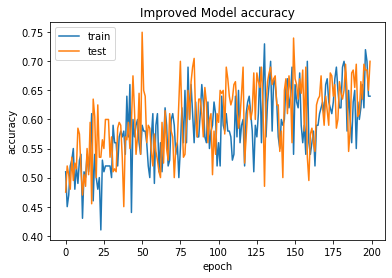

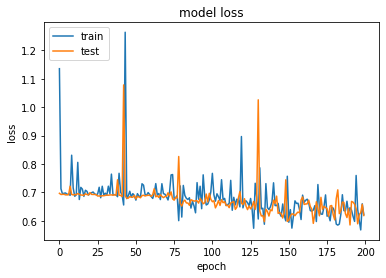

In [42]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Improved Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()